In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

plt.style.use('dark_background')

<IPython.core.display.Javascript object>

In [5]:
mnist_train_df = pd.read_csv("../data/raw/mnist_train.csv")

In [122]:
X = mnist_train_df.drop("label", axis=1)
y = mnist_train_df.loc[:,'label']

In [123]:
skf = StratifiedKFold(n_splits=10, random_state=24, shuffle=True)
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=24)

In [125]:
fold = 1
mnist_train_df["kfold"] = np.nan
for train_index, test_index in skf.split(X, y):
    mnist_train_df.loc[test_index,:] = mnist_train_df.loc[test_index,:].assign(kfold=fold)
    fold += 1
    
    # get the last fold example to plot later for label distribution
    train = mnist_train_df.loc[train_index,:]
    test = mnist_train_df.loc[test_index,:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

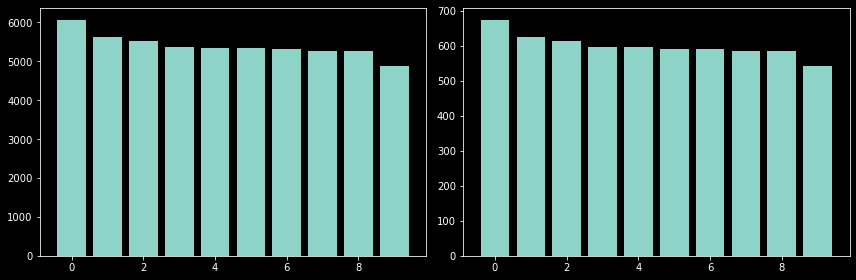

In [126]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(sorted(train["label"].unique()), train["label"].value_counts())
ax[1].bar(sorted(test["label"].unique()), test["label"].value_counts())

plt.tight_layout()